# Cyberbulling Analysis: ML Course project

In [53]:
#importing libraries
import pandas as pd
import numpy as np
import os
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns
from wordcloud import WordCloud
# !pip install wordcloud

In [54]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

### Importing Data

In [55]:
cb =pd.read_csv("Cyberbullying.csv")

In [56]:
cb.select_dtypes(exclude='object').dtypes

Series([], dtype: object)

In [57]:
cb.head()

,tweet_text,text
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [58]:
cb.text.value_counts()

text
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Non-Bullying            638
Bullying                427
Name: count, dtype: int64

In [59]:
# Encoding the labels
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

cb['cyberbullying_type_encoded'] = labelencoder.fit_transform(cb['text'])

In [60]:
cb[['text', 'cyberbullying_type_encoded']].value_counts()


text                 cyberbullying_type_encoded
religion             7                             7998
age                  2                             7992
gender               4                             7973
ethnicity            3                             7961
not_cyberbullying    5                             7945
other_cyberbullying  6                             7823
Non-Bullying         1                              638
Bullying             0                              427
Name: count, dtype: int64

In [61]:
cb.head()

,tweet_text,text,cyberbullying_type_encoded
0,"In other words #katandandre, your food was cra...",not_cyberbullying,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,5
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,5
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,5


<AxesSubplot:xlabel='text'>

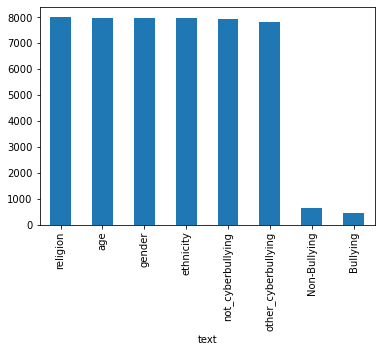

In [62]:
#data visualization
cb['text'].value_counts().plot(kind='bar')

In [63]:
import re
import string
cb.tweet_text.head()

0    In other words #katandandre, your food was cra...
1    Why is #aussietv so white? #MKR #theblock #ImA...
2    @XochitlSuckkks a classy whore? Or more red ve...
3    @Jason_Gio meh. :P  thanks for the heads up, b...
4    @RudhoeEnglish This is an ISIS account pretend...
Name: tweet_text, dtype: object

In [64]:
cb.text.value_counts()

text
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Non-Bullying            638
Bullying                427
Name: count, dtype: int64

In [65]:
# converting tweet text to lower case
cb['tweet_text'] = cb['tweet_text'].str.lower()
cb.tail()

,tweet_text,text,cyberbullying_type_encoded
48752,"no we are not, but you are a race baiting libt...",Bullying,0
48753,"you wont get anyone for this challenge., after...",Bullying,0
48754,"i will follow you if you are not a libtard,mus...",Bullying,0
48755,"michaelianblack ur a child, an ostrich w/ your...",Bullying,0
48756,foxnews. not to all the ppl i know that live t...,Bullying,0


In [66]:
cb.head()

,tweet_text,text,cyberbullying_type_encoded
0,"in other words #katandandre, your food was cra...",not_cyberbullying,5
1,why is #aussietv so white? #mkr #theblock #ima...,not_cyberbullying,5
2,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying,5
3,"@jason_gio meh. :p thanks for the heads up, b...",not_cyberbullying,5
4,@rudhoeenglish this is an isis account pretend...,not_cyberbullying,5


In [67]:
# Checking for null values
np.sum(cb.isnull())

tweet_text                    0
text                          0
cyberbullying_type_encoded    0
dtype: int64

### Data cleaning

In [68]:
# stopwords list that needs to be excluded from the data
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [69]:
# removing stopwoords from the tweet text
STOPWORDS = set(stopwordlist)

def clean_stopwords(tweet):
    return " ".join([word for word in str(tweet).split() if word not in STOPWORDS])

cb['tweet_text'] = cb['tweet_text'].apply(lambda tweet: clean_stopwords(tweet))

In [70]:
# cleaning and removing punctuations

import string
english_puctuations = string.punctuation
def clean_puctuations(text):
    translator = str.maketrans('','', english_puctuations)
    return text.translate(translator)

cb['tweet_text'] = cb['tweet_text'].apply(lambda x : clean_puctuations(x))

In [102]:
cb['tweet_text'][20]

'halalcunti biebervalu liamxkiwi greenlinerzjm halalflaw know saudi chase girl burn build httptcoaclczn'

In [72]:
# cleaning and removing repeating characters
def clean_repeating_characters(tweet):
    return re.sub(r'(.)1+', r'1', tweet)

cb['tweet_text'] = cb['tweet_text'].apply(lambda x: clean_repeating_characters(x))

In [73]:
# cleaning and removing numeric data

def clean_numeric(text):
    return re.sub('[0-9]+', '', text)
    
cb['tweet_text'] = cb['tweet_text'].apply(lambda x: clean_numeric(x))

In [74]:
# Tokenization of tweet text

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
cb['tweet_text'] = cb['tweet_text'].apply(tokenizer.tokenize)

In [75]:
cb.head(20)

,tweet_text,text,cyberbullying_type_encoded
0,"[words, katandandre, food, crapilicious, mkr]",not_cyberbullying,5
1,"[aussietv, white, mkr, theblock, imacelebritya...",not_cyberbullying,5
2,"[xochitlsuckkks, classy, whore, red, velvet, c...",not_cyberbullying,5
3,"[jasongio, meh, p, thanks, heads, up, but, not...",not_cyberbullying,5
4,"[rudhoeenglish, isis, account, pretending, kur...",not_cyberbullying,5
5,"[rajaaab, quickieleaks, yes, test, god, good, ...",not_cyberbullying,5
6,"[itu, sekolah, ya, bukan, tempat, bully, ga, j...",not_cyberbullying,5
7,"[karma, hope, bites, kat, butt, nasty, mkr]",not_cyberbullying,5
8,"[stockputout, everything, but, mostly, priest]",not_cyberbullying,5
9,"[rebecca, black, drops, school, due, bullying]",not_cyberbullying,5


In [76]:
np.sum(cb.isnull())

tweet_text                    0
text                          0
cyberbullying_type_encoded    0
dtype: int64

In [77]:
cb.head(15)

,tweet_text,text,cyberbullying_type_encoded
0,"[words, katandandre, food, crapilicious, mkr]",not_cyberbullying,5
1,"[aussietv, white, mkr, theblock, imacelebritya...",not_cyberbullying,5
2,"[xochitlsuckkks, classy, whore, red, velvet, c...",not_cyberbullying,5
3,"[jasongio, meh, p, thanks, heads, up, but, not...",not_cyberbullying,5
4,"[rudhoeenglish, isis, account, pretending, kur...",not_cyberbullying,5
5,"[rajaaab, quickieleaks, yes, test, god, good, ...",not_cyberbullying,5
6,"[itu, sekolah, ya, bukan, tempat, bully, ga, j...",not_cyberbullying,5
7,"[karma, hope, bites, kat, butt, nasty, mkr]",not_cyberbullying,5
8,"[stockputout, everything, but, mostly, priest]",not_cyberbullying,5
9,"[rebecca, black, drops, school, due, bullying]",not_cyberbullying,5


In [78]:
# stemming

import nltk
st = nltk.PorterStemmer()

def text_stemming(tweet):
    tweet = [st.stem(word) for word in tweet]
    return tweet

cb['tweet_text'] = cb['tweet_text'].apply(lambda x: text_stemming(x))

In [79]:
cb['tweet_text'][103]

['edgeofthesandbx',
 'batchelorshow',
 'feardept',
 'dozen',
 'wit',
 'seen',
 'russian',
 'target',
 'civilian',
 'propaganda']

In [80]:
# lemmatization

lm = nltk.WordNetLemmatizer()
def text_lemmatization(tweet):
    tweet = [lm.lemmatize(word) for word in tweet]
    return tweet

cb['tweet_text'] = cb['tweet_text'].apply(lambda x: text_lemmatization(x))

In [81]:
cb['tweet_text'][103]

['edgeofthesandbx',
 'batchelorshow',
 'feardept',
 'dozen',
 'wit',
 'seen',
 'russian',
 'target',
 'civilian',
 'propaganda']

In [82]:
cb['tweet_text'].head()

0             [word, katandandr, food, crapilici, mkr]
1    [aussietv, white, mkr, theblock, imacelebritya...
2    [xochitlsuckkk, classi, whore, red, velvet, cu...
3    [jasongio, meh, p, thank, head, up, but, not, ...
4    [rudhoeenglish, isi, account, pretend, kurdish...
Name: tweet_text, dtype: object

In [83]:
# plotting word cloud excluding other_cybberbullying and not_cyberbullying
new_cb = cb
new_cb = new_cb[new_cb['text'] != 'other_cyberbullying']
new_cb = new_cb[new_cb['text'] != 'not_cyberbullying']
new_cb = new_cb[new_cb['text'] != 'Non-Bullying']
new_cb = new_cb['tweet_text'].apply(lambda x: " ".join(x))

In [84]:
# plotting word cloud excluding other_cybberbullying and not_cyberbullying
new_cb2 = cb
new_cb2 = new_cb2[new_cb2['text'] != 'other_cyberbullying']
new_cb2 = new_cb2[new_cb2['text'] != 'not_cyberbullying']
new_cb2 = new_cb2[new_cb2['text'] != 'Non-Bullying']
new_cb2 = new_cb2[new_cb2['text'] != 'religion']
new_cb2 = new_cb2[new_cb2['text'] != 'gender']
new_cb2 = new_cb2[new_cb2['text'] != 'age']
new_cb2 = new_cb2[new_cb2['text'] != 'Bullying']
new_cb2 = new_cb2['tweet_text'].apply(lambda x: " ".join(x))

In [85]:
new_cb2

39731    hey dumb fuck celeb stop someth peopl public f...
39732    fuck u bitch rt tayyoung fuck obama dumb as ni...
39733    joebiden no joe racist mani video audio clip r...
39734    truck look dumb fuck tri make look wors aint c...
39735                       nigger food cafe today disgust
                               ...                        
47687    black ppl arent expect anyth depend anyth yet ...
47688    turner not withhold disappoint turner call cou...
47689    swear god dumb nigger bitch got bleach hair re...
47690    yea fuck rt therealexel nigger fuck unfollow m...
47691    bro u gotta chill rt chillshrammi dog fuck kp ...
Name: tweet_text, Length: 7961, dtype: object

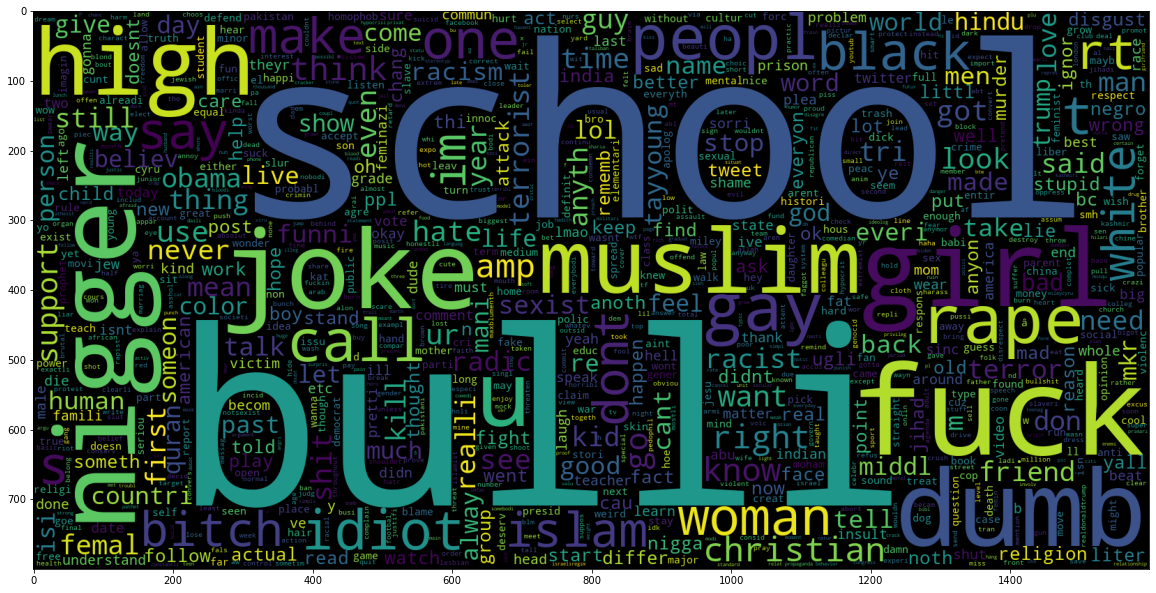

In [86]:
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(new_cb))
plt.imshow(wc)

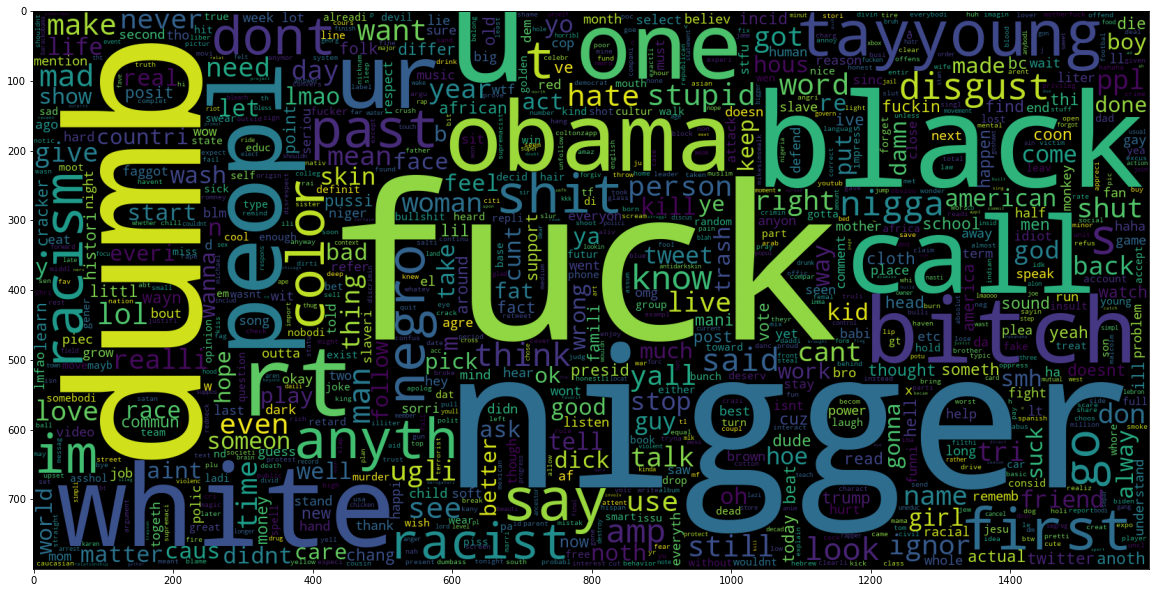

In [87]:
plt.figure(figsize= (20,20))
wc2 = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(new_cb2))
plt.imshow(wc2)

In [88]:
cb.head(14)

,tweet_text,text,cyberbullying_type_encoded
0,"[word, katandandr, food, crapilici, mkr]",not_cyberbullying,5
1,"[aussietv, white, mkr, theblock, imacelebritya...",not_cyberbullying,5
2,"[xochitlsuckkk, classi, whore, red, velvet, cu...",not_cyberbullying,5
3,"[jasongio, meh, p, thank, head, up, but, not, ...",not_cyberbullying,5
4,"[rudhoeenglish, isi, account, pretend, kurdish...",not_cyberbullying,5
5,"[rajaaab, quickieleak, ye, test, god, good, ba...",not_cyberbullying,5
6,"[itu, sekolah, ya, bukan, tempat, bulli, ga, j...",not_cyberbullying,5
7,"[karma, hope, bite, kat, butt, nasti, mkr]",not_cyberbullying,5
8,"[stockputout, everyth, but, mostli, priest]",not_cyberbullying,5
9,"[rebecca, black, drop, school, due, bulli]",not_cyberbullying,5


## MODEL CREATION

In [89]:
cb['tweet_text'] = cb['tweet_text'].apply(lambda x : " ".join(x))
cb

,tweet_text,text,cyberbullying_type_encoded
0,word katandandr food crapilici mkr,not_cyberbullying,5
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,5
2,xochitlsuckkk classi whore red velvet cupcak,not_cyberbullying,5
3,jasongio meh p thank head up but not concern a...,not_cyberbullying,5
4,rudhoeenglish isi account pretend kurdish acco...,not_cyberbullying,5
...,...,...,...
48752,no not but race bait libtard jackwagon,Bullying,0
48753,wont get anyon challeng snowflak libtard ton g...,Bullying,0
48754,follow not libtardmuslim ate involv blm er,Bullying,0
48755,michaelianblack ur child ostrich w head sand p...,Bullying,0


In [90]:
# Splitting the data into train and test
X, y = cb['tweet_text'], cb['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 41)

In [91]:
# Transforming the data using TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 500000)
vectoriser.fit(X_train)
print("No. of feature words: ",len(vectoriser.get_feature_names()))

No. of feature words:  360141


C:\Users\mrunm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [92]:
# transforming the data
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [93]:
# Model
from sklearn.svm import SVC
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train, y_train)
svm_predictions  = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

0.8221903199343724


In [94]:
print(classification_report(y_test,svm_predictions))
print(confusion_matrix(y_test,svm_predictions))
print('Accuracy',accuracy_score(y_test,svm_predictions))

                     precision    recall  f1-score   support

           Bullying       0.54      0.37      0.44        90
       Non-Bullying       0.60      0.22      0.32       123
                age       0.92      0.99      0.95      1574
          ethnicity       0.95      0.99      0.97      1639
             gender       0.91      0.87      0.89      1631
  not_cyberbullying       0.62      0.49      0.55      1588
other_cyberbullying       0.59      0.69      0.64      1521
           religion       0.93      0.96      0.95      1586

           accuracy                           0.82      9752
          macro avg       0.76      0.70      0.71      9752
       weighted avg       0.82      0.82      0.82      9752

[[  33   11    1    7    8    5   22    3]
 [  15   27    2   11    8   12   46    2]
 [   0    0 1554    1    2    6   11    0]
 [   1    0    1 1620    5    4    8    0]
 [   4    1    8   14 1420   88   88    8]
 [   3    5   98   20   58  784  549   71]
 [   5 

In [95]:
# fitting naive bayes to the training set
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

classifier = MultinomialNB().fit(X_train, y_train)

In [96]:
# predicting test set results
y_pred = classifier.predict(X_test)

In [97]:

print(classification_report(y_test,y_pred)) 
print('Accuracy',accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

                     precision    recall  f1-score   support

           Bullying       0.00      0.00      0.00        90
       Non-Bullying       0.00      0.00      0.00       123
                age       0.66      0.99      0.80      1574
          ethnicity       0.82      0.94      0.88      1639
             gender       0.82      0.86      0.84      1631
  not_cyberbullying       0.60      0.32      0.42      1588
other_cyberbullying       0.61      0.38      0.47      1521
           religion       0.77      0.98      0.86      1586

           accuracy                           0.73      9752
          macro avg       0.54      0.56      0.53      9752
       weighted avg       0.70      0.73      0.70      9752

Accuracy 0.7326702214930271
[[   0    0   15   35   14    1    4   21]
 [   0    0   33   24   23    1    7   35]
 [   0    0 1562    6    0    0    1    5]
 [   0    0   43 1542    7    5    5   37]
 [   0    0   42   47 1403   64   38   37]
 [   0    0  345   77 

C:\Users\mrunm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mrunm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mrunm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [99]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [100]:
y_pred1 = dt.predict(X_test)

In [101]:
print(classification_report(y_test,y_pred1)) 
print(confusion_matrix(y_test,y_pred1))
print('Accuracy',accuracy_score(y_test,y_pred1))

                     precision    recall  f1-score   support

           Bullying       0.31      0.37      0.34        90
       Non-Bullying       0.34      0.20      0.25       123
                age       0.97      0.97      0.97      1574
          ethnicity       0.98      0.96      0.97      1639
             gender       0.86      0.82      0.84      1631
  not_cyberbullying       0.49      0.49      0.49      1588
other_cyberbullying       0.48      0.54      0.51      1521
           religion       0.95      0.91      0.93      1586

           accuracy                           0.77      9752
          macro avg       0.67      0.66      0.66      9752
       weighted avg       0.78      0.77      0.78      9752

[[  33   16    1    3    9    6   20    2]
 [  28   24    2    7    9   22   29    2]
 [   1    0 1526    1    3   22   20    1]
 [   2    2    4 1580   10   17   17    7]
 [   4    8    3    3 1342  114  151    6]
 [   6    8   23    6   94  777  622   52]
 [  26 